In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\Sourav Balan\Downloads\car_age_price.csv")

In [3]:
data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [5]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


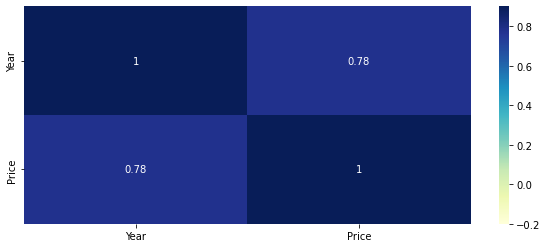

In [6]:
corrmatrix=data.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix,vmin=-0.2,vmax=0.9,annot=True,cmap='YlGnBu')
plt.show()

Year and Price are positively correlated
Price is the target variable and Year is the predictive variable.

In [7]:
x=data['Year'].values.reshape(-1,1)
y=data['Price'].values.reshape(-1,1)

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model=lr.fit(x_train,y_train)
predictions=model.predict(x_test)

In [10]:
y_pred = model.predict(x)
print(f"predicted response:\n{y_pred}")

predicted response:
[[553167.34471273]
 [600775.91252081]
 [600775.91252081]
 [553167.34471273]
 [553167.34471273]
 [410341.6412885 ]
 [457950.20909658]
 [505558.77690466]
 [505558.77690466]
 [505558.77690466]
 [600775.91252081]
 [553167.34471273]
 [505558.77690466]
 [600775.91252081]
 [505558.77690466]
 [505558.77690466]
 [505558.77690466]
 [505558.77690466]
 [600775.91252081]
 [505558.77690466]
 [553167.34471273]
 [600775.91252081]
 [410341.6412885 ]
 [505558.77690466]
 [505558.77690466]
 [505558.77690466]
 [505558.77690466]
 [505558.77690466]
 [505558.77690466]
 [505558.77690466]
 [600775.91252081]
 [505558.77690466]
 [505558.77690466]
 [505558.77690466]
 [505558.77690466]
 [505558.77690466]
 [505558.77690466]
 [505558.77690466]
 [553167.34471273]
 [648384.48032889]
 [600775.91252081]
 [600775.91252081]
 [553167.34471273]
 [600775.91252081]
 [600775.91252081]
 [553167.34471273]
 [600775.91252081]
 [553167.34471273]
 [457950.20909658]
 [553167.34471273]
 [315124.50567235]
 [553167.34

In [11]:
from sklearn.metrics import mean_squared_error,r2_score
print('Mean squared error is: ',mean_squared_error(y_test,predictions))
print('R squared value is: ',r2_score(y_test,predictions))

Mean squared error is:  4326906256.829671
R squared value is:  0.36759313425902185


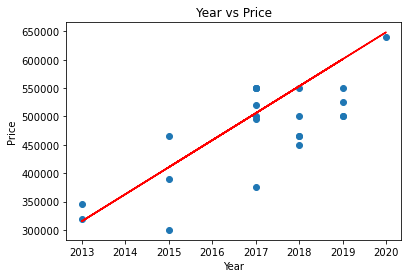

In [12]:
plt.scatter(x_test, y_test)
plt.plot(x_test,predictions, 'r')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Year vs Price')
plt.show()

Lasso Regression

In [19]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 1)
lasso.fit(x_train, y_train)
y_pred1 = lasso.predict(x_test)
mean_squared_error = np.mean((y_pred1 - y_test)**2)
print("Mean squared error on test set", mean_squared_error)
lasso_coeff = pd.DataFrame()
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_) 
print(lasso_coeff)

Mean squared error on test set 14960847796.794611
   Coefficient Estimate
0            47608.1556


Lower the MSE,the closer is forcast to actual. Here MSE by Lasso is greater than Linear Regression. Here Linear regression performs better